# <div style="text-align: right"> Chapter __13__</div>

# __Dates with lubridate__

In [1]:
# config
repr_html.tbl_df <- function(obj, ..., rows = 6) repr:::repr_html.data.frame(obj, ..., rows = rows)
options(dplyr.summarise.inform = FALSE)

In [2]:
library(tidyverse)
library(lubridate)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




There are three types of date/time data that refer to an instant in
time:
* A date. Tibbles print this as <date> .
* A time within a day. Tibbles print this as <time> .
* A date-time is a date plus a time: it uniquely identifies an instant
in time (typically to the nearest second). Tibbles print this as
<dttm> . Elsewhere in R these are called POSIXct, but I don’t
think that’s a very useful name.

In this chapter we are only going to focus on dates and date-times as
R doesn’t have a native class for storing times. If you need one, you
can use the __hms__ package.

In [3]:
today()

[1] "2020-09-11"

In [4]:
now()

[1] "2020-09-11 17:14:43 CDT"

In [5]:
ymd('2017-01-31')

[1] "2017-01-31"

In [6]:
as.Date('2017-01-31', format = '%Y-%m-%d')

[1] "2017-01-31"

In [7]:
mdy('January 31st, 2017')

[1] "2017-01-31"

In [8]:
dmy('31-Jan-2017')

[1] "2017-01-31"

In [9]:
dmy('31 01 2019')

[1] "2019-01-31"

In [10]:
dmy('31/3/2020')

[1] "2020-03-31"

In [11]:
ymd(20170131)

[1] "2017-01-31"

In [12]:
ymd_hms('2017-01-31 20:11:50')

[1] "2017-01-31 20:11:50 UTC"

In [13]:
mdy_hm('01/31/2017 08:01')

[1] "2017-01-31 08:01:00 UTC"

In [14]:
ymd(20170131, tz = 'UTC')

[1] "2017-01-31 UTC"

## From Individual Components
Instead of a single string, sometimes you’ll have the individual com‐
ponents of the date-time spread across multiple columns. This is
what we have in the flights data:

In [15]:
flights %>%
    select(year, month, day, hour, minute)

year,month,day,hour,minute
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,5,15
2013,1,1,5,29
2013,1,1,5,40
⋮,⋮,⋮,⋮,⋮
2013,9,30,12,10
2013,9,30,11,59
2013,9,30,8,40


To create a date/time from this sort of input, use `make_date()` for
dates, or `make_datetime()` for date-times:

In [16]:
flights %>%
    select(year, month, day, hour, minute) %>%
    mutate(departure = make_datetime(year, month, day, hour, minute))

year,month,day,hour,minute,departure
<int>,<int>,<int>,<dbl>,<dbl>,<dttm>
2013,1,1,5,15,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:40:00
⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,12,10,2013-09-30 12:10:00
2013,9,30,11,59,2013-09-30 11:59:00
2013,9,30,8,40,2013-09-30 08:40:00


Let’s do the same thing for each of the four time columns in
flights . The times are represented in a slightly odd format, so we
use modulus arithmetic to pull out the hour and minute compo‐
nents.

In [17]:
make_datetime_100 <- function(year, month, day, time) {
    make_datetime(year, month, day, time %/% 100, time %% 100)
}

In [18]:
flights_dt <- flights %>%
    filter(!is.na(dep_time), !is.na(arr_time)) %>%
    mutate(dep_time = make_datetime_100(year, month, day, dep_time),
           arr_time = make_datetime_100(year, month, day, arr_time),
           sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
           sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)) %>%
    select(origin, dest, ends_with('delay'), ends_with('time'))

In [19]:
flights_dt

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
JFK,ROC,-5,-16,2013-09-30 22:41:00,2013-09-30 22:46:00,2013-09-30 23:45:00,2013-09-30 00:01:00,47
JFK,BOS,12,1,2013-09-30 23:07:00,2013-09-30 22:55:00,2013-09-30 23:59:00,2013-09-30 23:58:00,33
JFK,PSE,-10,-25,2013-09-30 23:49:00,2013-09-30 23:59:00,2013-09-30 03:25:00,2013-09-30 03:50:00,196


With this data, I can visualize the distribution of departure times
across the year:

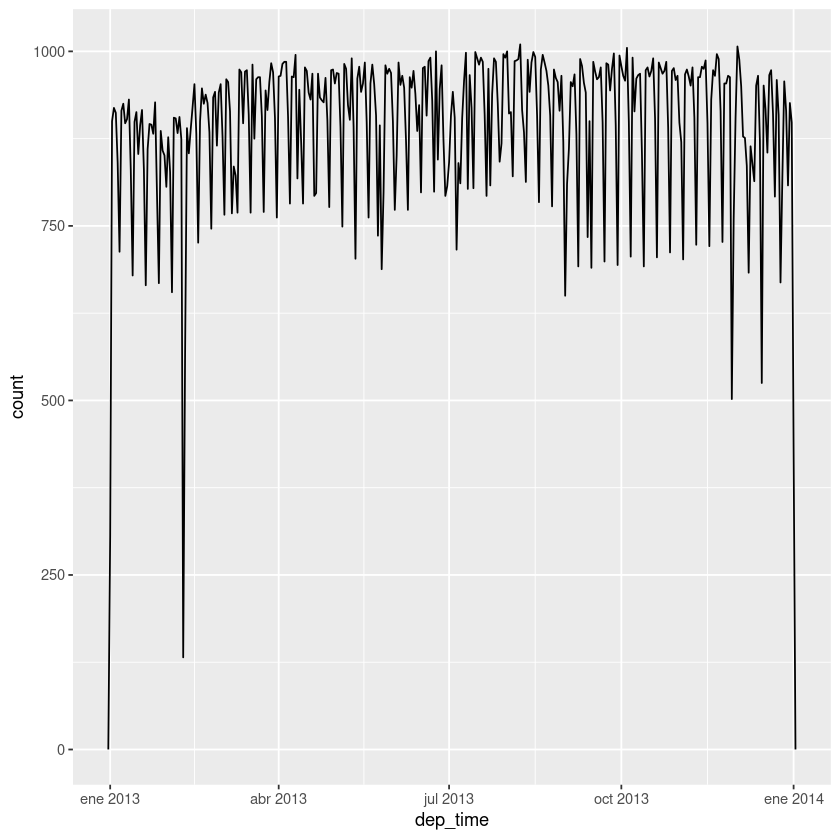

In [20]:
flights_dt %>%
    ggplot(aes(dep_time)) +
    geom_freqpoly(binwidth = 86400)

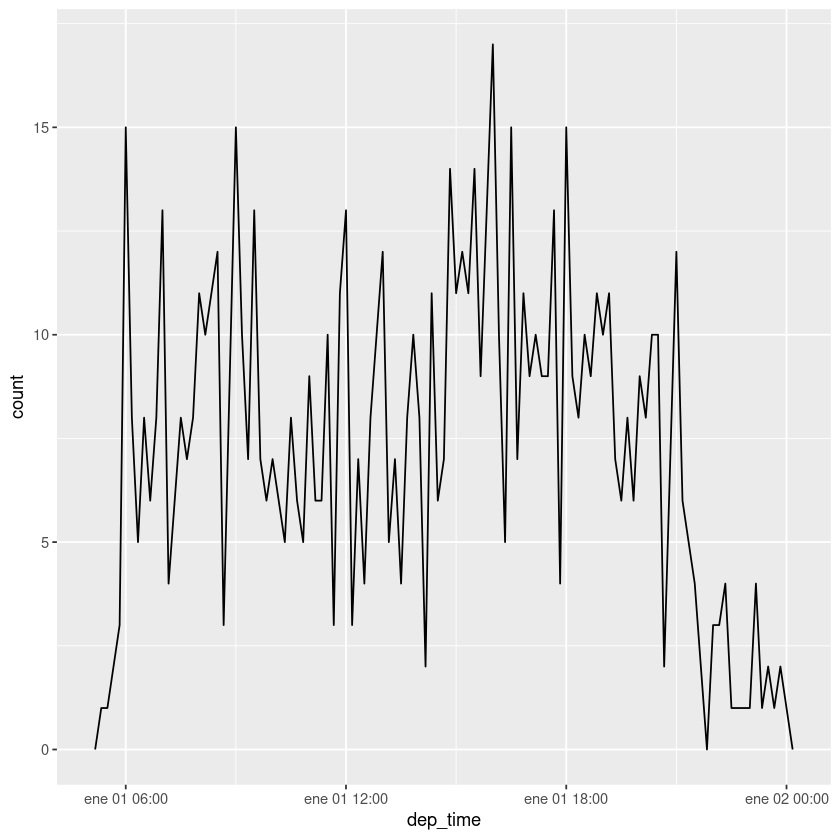

In [21]:
# or withing a single day
flights_dt %>%
    filter(dep_time < ymd(20130102)) %>%
    ggplot(aes(dep_time)) +
    geom_freqpoly(binwidth = 600)

### From Other Types
You may want to switch between a date-time and a date. That’s he
job of `as_datetime()` and `as_date()` :

In [22]:
as_datetime(today())

[1] "2020-09-11 UTC"

In [23]:
as_date(now())

[1] "2020-09-11"

Sometimes you’ll get date/times as numeric offsets from the “Unix
Epoch,” 1970-01-01. If the offset is in seconds, use `as_datetime()` ; if
it’s in days, use `as_date()` :

In [24]:
as_datetime(60 * 60 * 10)

[1] "1970-01-01 10:00:00 UTC"

In [25]:
as_date(365 * 10 + 2)

[1] "1980-01-01"

1. What happens if you parse a string that contains invalid dates?

In [26]:
ymd(c("2010-10-10", "bananas"))

Warning message:
“ 1 failed to parse.”


[1] "2010-10-10" NA

Use the appropriate lubridate function to parse each of the following dates:

In [27]:
d1 <- "January 1, 2010"
d2 <- "2015-Mar-07"
d3 <- "06-Jun-2017"
d4 <- c("August 19 (2015)", "July 1 (2015)")
d5 <- "12/30/14"

In [28]:
mdy(d1)
ymd(d2)
dmy(d3)
mdy(d4)
mdy(d5)

[1] "2010-01-01"

Warning message:
“All formats failed to parse. No formats found.”


[1] NA

[1] "2017-06-06"

[1] "2015-08-19" "2015-07-01"

[1] "2014-12-30"

## __Date-Time Components__

You can pull out individual parts of the date with the accessor functions year() , month() , mday() (day of the month), yday() (day of
the year), wday() (day of the week), hour() , minute() , and second() :

In [29]:
datetime <- ymd_hms('2016-07-08 12:34:56')

In [30]:
year(datetime)

[1] 2016

In [31]:
month(datetime)

[1] 7

In [32]:
mday(datetime)

[1] 8

In [33]:
yday(datetime)

[1] 190

In [34]:
wday(datetime)

[1] 6

For month() and wday() you can set label = TRUE to return the
abbreviated name of the month or day of the week. Set abbr =
FALSE to return the full name:

In [35]:
month(datetime, label = TRUE)

[1] jul
12 Levels: ene < feb < mar < abr < may < jun < jul < ago < sep < ... < dic

In [36]:
wday(datetime, label = TRUE, abbr = FALSE)

[1] viernes
7 Levels: domingo < lunes < martes < miércoles < jueves < ... < sábado

We can use wday() to see that more flights depart during the week
than on the weekend:

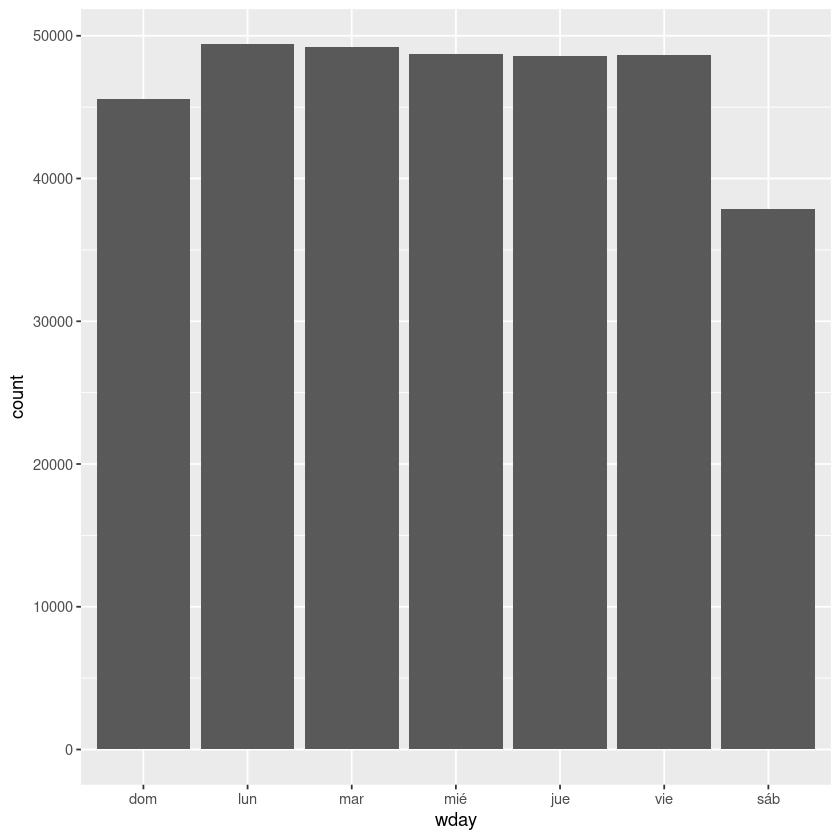

In [37]:
flights_dt %>%
    mutate(wday = wday(dep_time, label = TRUE)) %>%
    ggplot(aes(x =wday)) +
        geom_bar()

There’s an interesting pattern if we look at the average departure
delay by minute within the hour. It looks like flights leaving in
minutes 20–30 and 50–60 have much lower delays than the rest of
the hour!

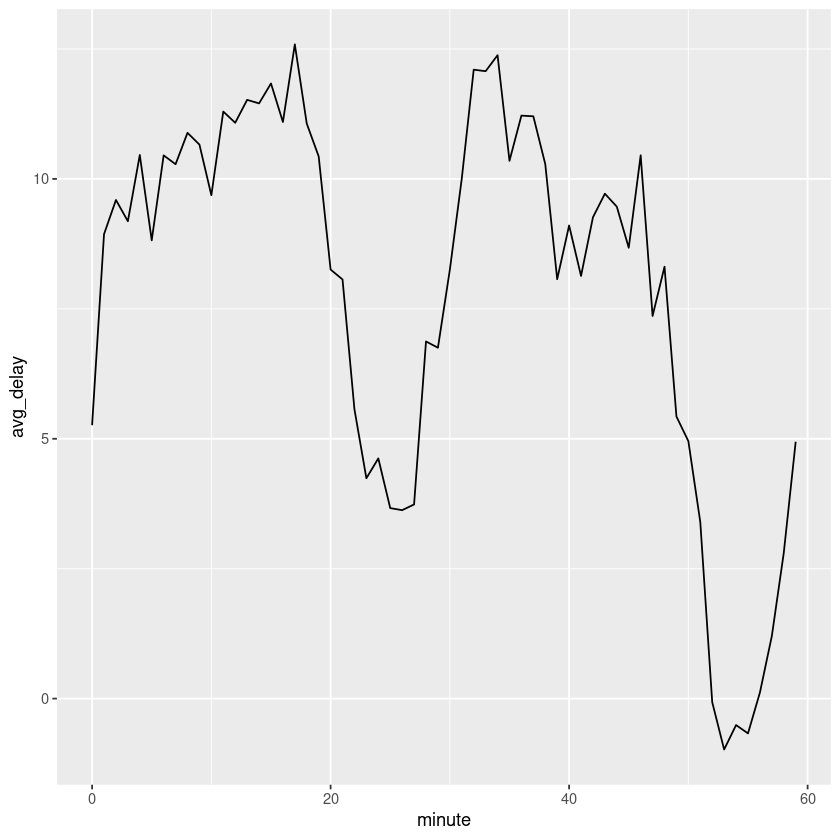

In [38]:
flights_dt %>%
    mutate(minute = minute(dep_time)) %>%
    group_by(minute) %>%
    summarize(avg_delay = mean(arr_delay, na.rm = TRUE),
              n = n()) %>%
    ggplot(aes(minute, avg_delay)) +
        geom_line()

Interestingly, if we look at the scheduled departure time we don’t see
such a strong pattern:

In [39]:
sched_dep <- flights_dt %>%
    mutate(minute = minute(sched_dep_time)) %>%
    group_by(minute) %>%
    summarize(avg_delay = mean(arr_delay, na.rm = TRUE),
              n = n())

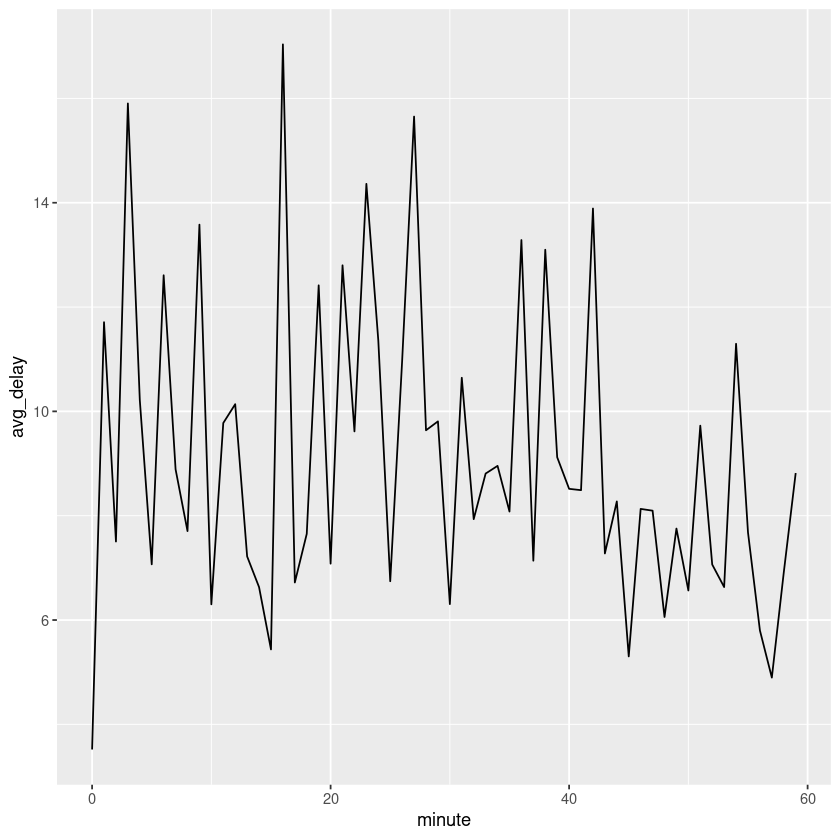

In [40]:
ggplot(sched_dep, aes(minute, avg_delay)) +
    geom_line()

So why do we see that pattern with the actual departure times? Well,
like much data collected by humans, there’s a strong bias toward
flights leaving at “nice” departure times. Always be alert for this sort
of pattern whenever you work with data that involves human judg‐
ment!

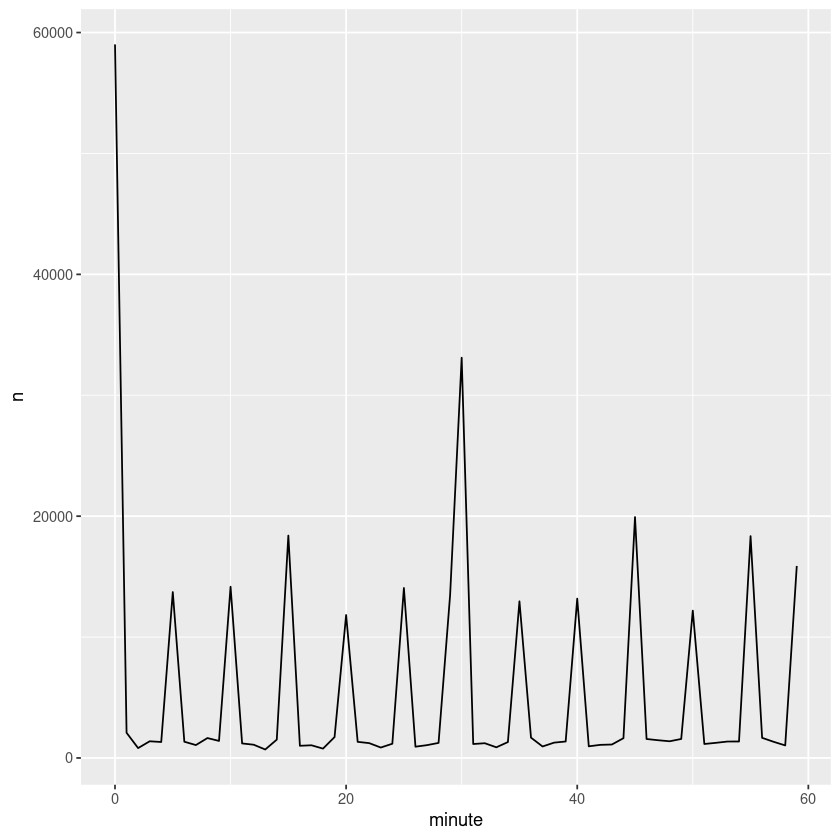

In [41]:
ggplot(sched_dep, aes(minute, n)) +
    geom_line()

## Rounding

An alternative approach to plotting individual components is to
round the date to a nearby unit of time, with `floor_date()` ,
`round_date()` , and `ceiling_date()` . Each `ceiling_date()` function
takes a vector of dates to adjust and then the name of the unit to
round down (floor), round up (ceiling), or round to. This, for exam‐
ple, allows us to plot the number of flights per week:

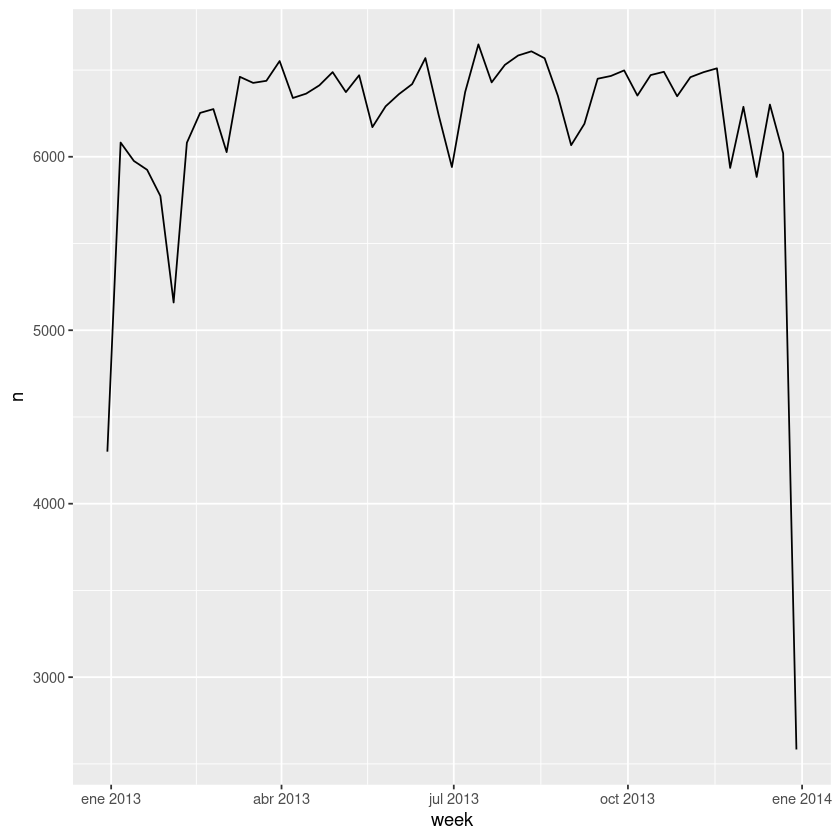

In [42]:
flights_dt %>%
    count(week = floor_date(dep_time, 'week')) %>%
    ggplot(aes(week, n)) +
        geom_line()

## Setting Components

You can also use each accessor function to set the components of a
date/time:

In [43]:
(datetime <- ymd_hms('2016-0708 12:34:56'))

[1] "2016-07-08 12:34:56 UTC"

In [44]:
year(datetime) <- 2020
datetime

[1] "2020-07-08 12:34:56 UTC"

In [45]:
month(datetime) <- 01
datetime

[1] "2020-01-08 12:34:56 UTC"

In [46]:
hour(datetime) <- hour(datetime) + 1
datetime

[1] "2020-01-08 13:34:56 UTC"

Alternatively, rather than modifying in place, you can create a new
date-time with `update()` . This also allows you to set multiple values
at once:

In [47]:
update(datetime, year = 2020, month = 2, mday = 2, hour = 2)

[1] "2020-02-02 02:34:56 UTC"

In [48]:
ymd('2015-02-01') %>%
    update(mday = 30)

[1] "2015-03-02"

In [49]:
ymd('2015-02-01') %>%
    update(hour = 400)

[1] "2015-02-17 16:00:00 UTC"

You can use `update()` to show the distribution of flights across the
course of the day for every day of the year:

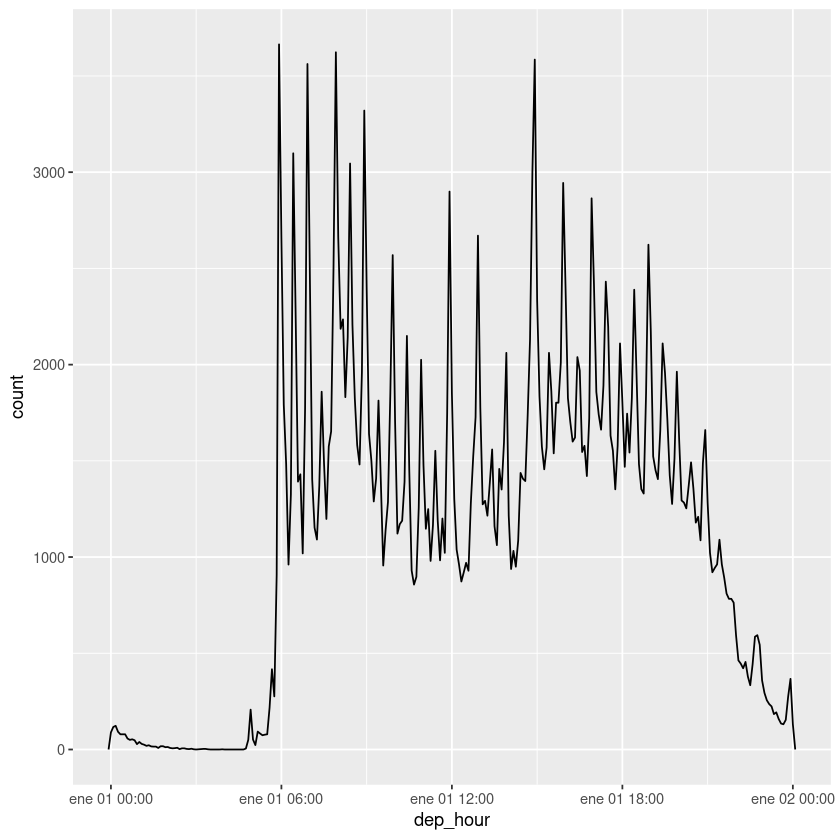

In [50]:
flights_dt %>%
    mutate(dep_hour = update(dep_time, yday = 1)) %>%
    ggplot(aes(dep_hour)) +
        geom_freqpoly(binwidth = 300)

Setting larger components of a date to a constant is a powerful technique that allows you to explore patterns in the smaller components.



How does the distribution of flight times within a day change over the course of the year?


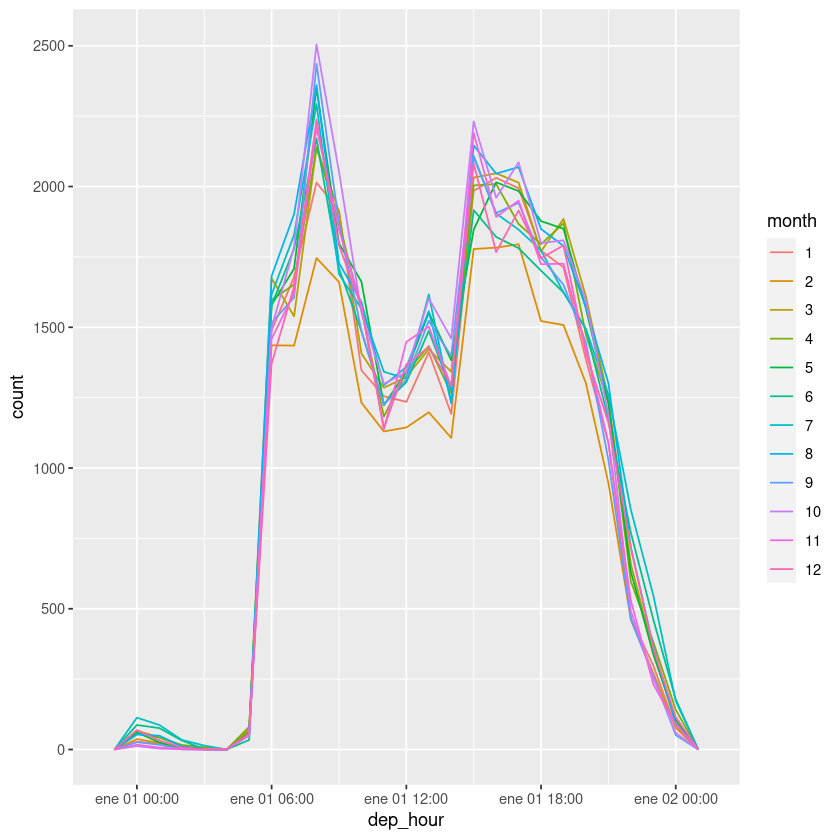

In [51]:
flights_dt %>%
    filter(!is.na(dep_time)) %>%
    mutate(dep_hour = update(dep_time, yday = 1)) %>%
    mutate(month = factor(month(dep_time))) %>%
    ggplot(aes(dep_hour, color = month)) +
    geom_freqpoly(binwidth = 60 * 60)

This will look better if everything is normalized within groups. The reason that February is lower is that there are fewer days and thus fewer flights.

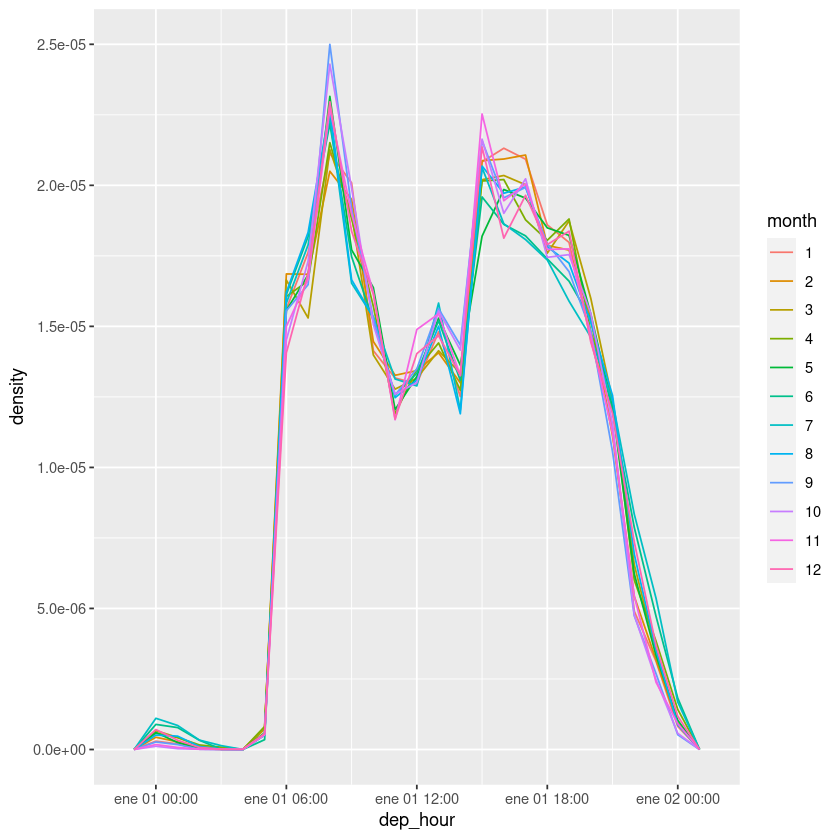

In [52]:
flights_dt %>%
    filter(!is.na(dep_time)) %>%
    mutate(dep_hour = update(dep_time, yday = 1)) %>%
    mutate(month = factor(month(dep_time))) %>%
    ggplot(aes(dep_hour, color = month)) +
    geom_freqpoly(aes(y = ..density..),
                  binwidth = 60 * 60)

How does the average delay time change over the course of a day? Should you use dep_time or sched_dep_time? Why?

Use sched_dep_time because that is the relevant metric for someone scheduling a flight. Also, using dep_time will always bias delays to later in the day since delays will push flights later.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



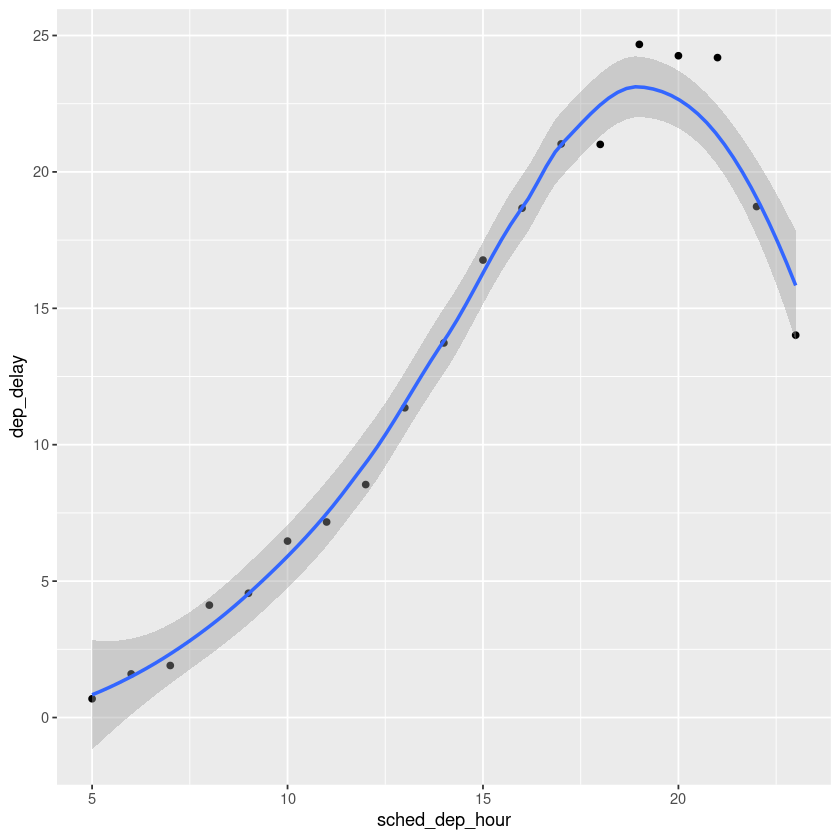

In [53]:
flights_dt %>%
    mutate(sched_dep_hour = hour(sched_dep_time)) %>%
    group_by(sched_dep_hour) %>%
    summarize(dep_delay = mean(dep_delay)) %>%
    ggplot(aes(y = dep_delay,
               x = sched_dep_hour)) +
    geom_point() +
    geom_smooth()



On what day of the week should you leave if you want to minimize the chance of a delay?


In [54]:
flights_dt %>%
    mutate(dow = wday(sched_dep_time)) %>%
    group_by(dow) %>%
    summarize(dep_delay = mean(dep_delay),
              arr_delay = mean(arr_delay, na.rm = TRUE)) %>%
    print(n = Inf)

# A tibble: 7 x 3
    dow dep_delay arr_delay
  <dbl>     <dbl>     <dbl>
1     1     11.5       4.82
2     2     14.7       9.65
3     3     10.6       5.39
4     4     11.7       7.05
5     5     16.1      11.7 
6     6     14.7       9.07
7     7      7.62     -1.45


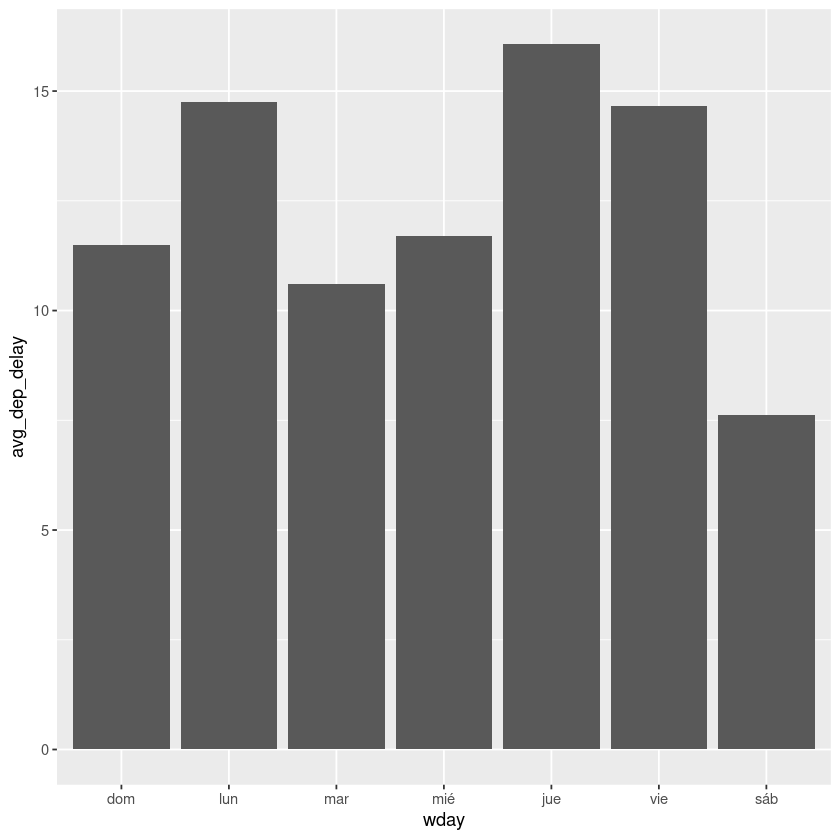

In [55]:
flights_dt %>%
    mutate(wday = wday(dep_time, label = TRUE)) %>%
    group_by(wday) %>%
    summarize(avg_dep_delay = mean(dep_delay, na.rm = TRUE)) %>%
    ggplot(aes(x = wday, y = avg_dep_delay)) +
    geom_bar(stat = 'identity')

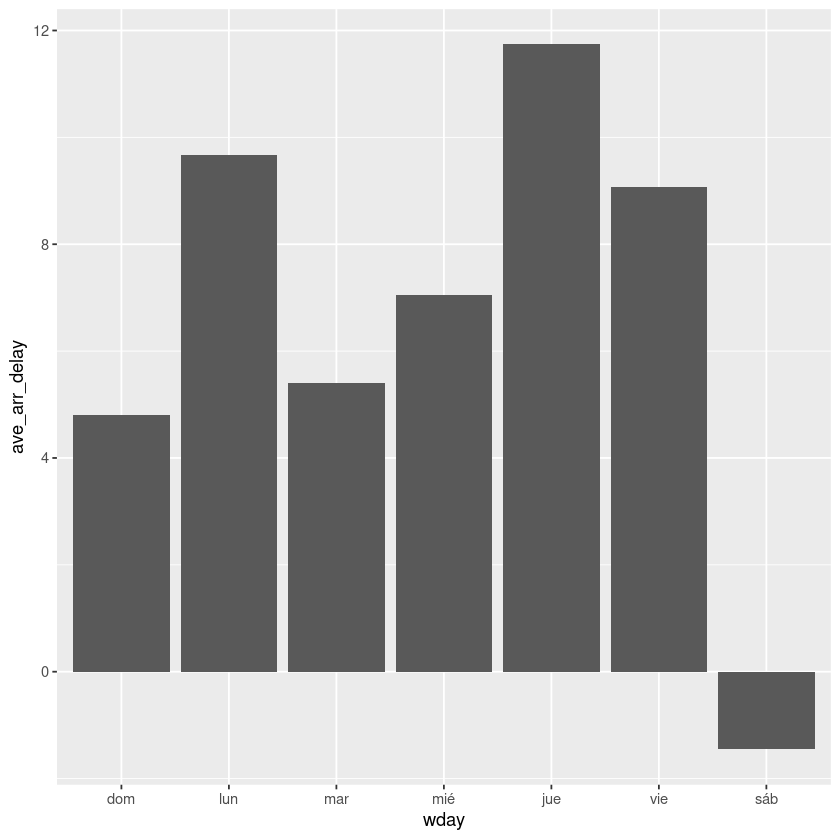

In [56]:
flights_dt %>% 
  mutate(wday = wday(dep_time, label = TRUE)) %>% 
  group_by(wday) %>% 
  summarize(ave_arr_delay = mean(arr_delay, na.rm = TRUE)) %>% 
  ggplot(aes(x = wday, y = ave_arr_delay)) + 
  geom_bar(stat = "identity")

Saturday has the lowest average departure delay time and the lowest average arrival delay time.



What makes the distribution of `diamonds$carat` and `flights$sched_dep_time` similar?


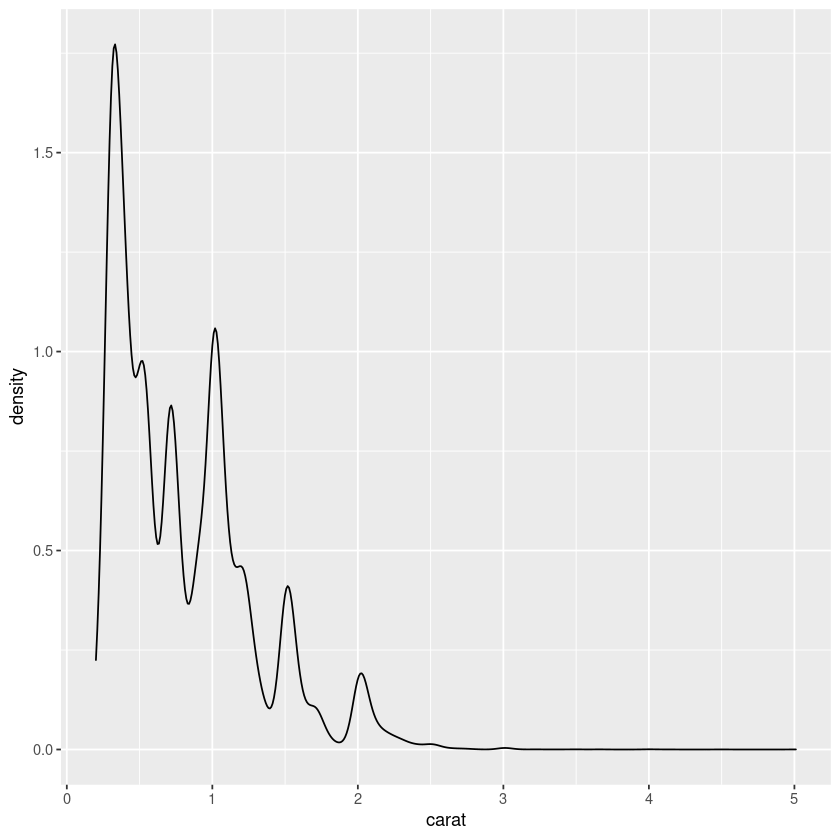

In [57]:
ggplot(diamonds, aes(x = carat)) +
    geom_density()

In both carat and sched_dep_time there are abnormally large numbers of values are at nice “human” numbers. In sched_dep_time it is at 00 and 30 minutes. In carats, it is at 0, 1/3, 1/2, 2/3,

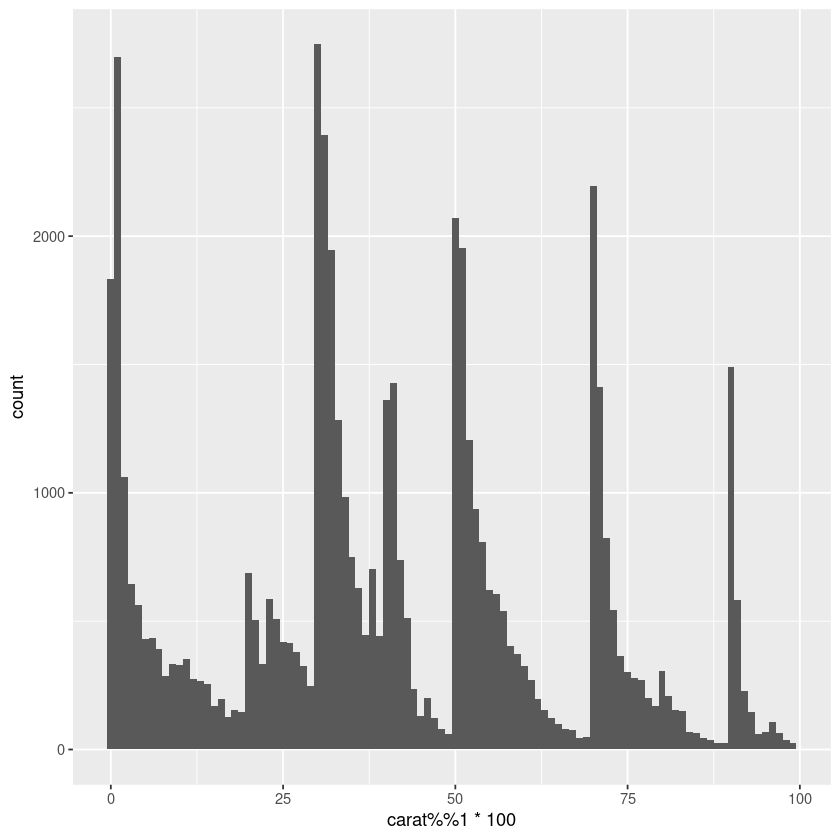

In [58]:
ggplot(diamonds, aes(x = carat %% 1 * 100)) +
    geom_histogram(binwidth = 1)

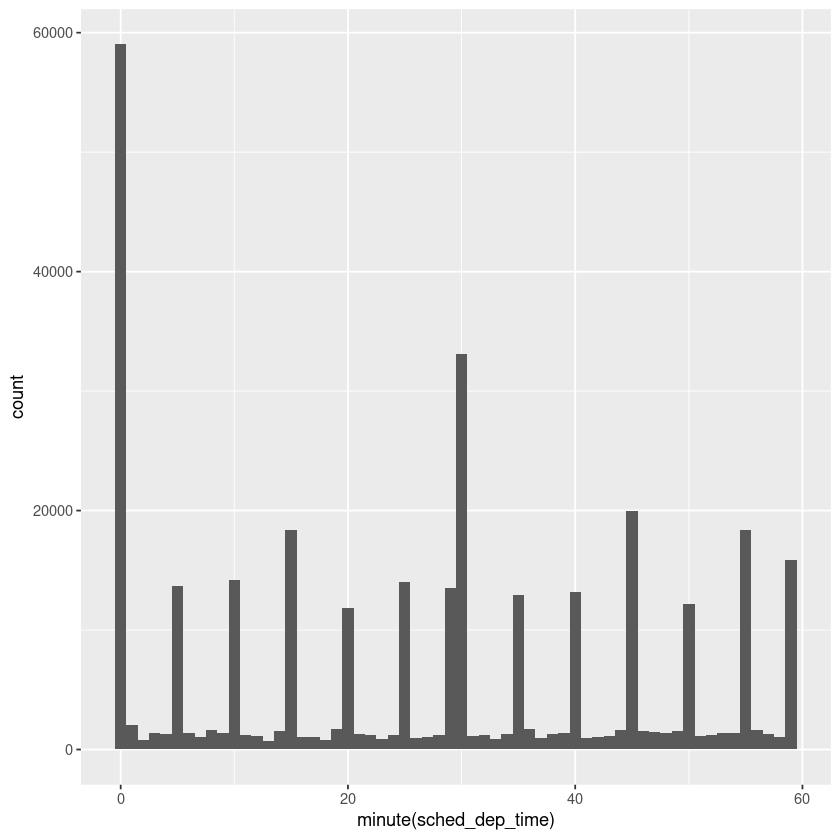

In [59]:
ggplot(flights_dt, aes(x = minute(sched_dep_time))) +
    geom_histogram(binwidth = 1)

Exercise 16.3.7

Confirm my hypothesis that the early departures of flights in minutes 20-30 and 50-60 are caused by scheduled flights that leave early. Hint: create a binary variable that tells you whether or not a flight was delayed.

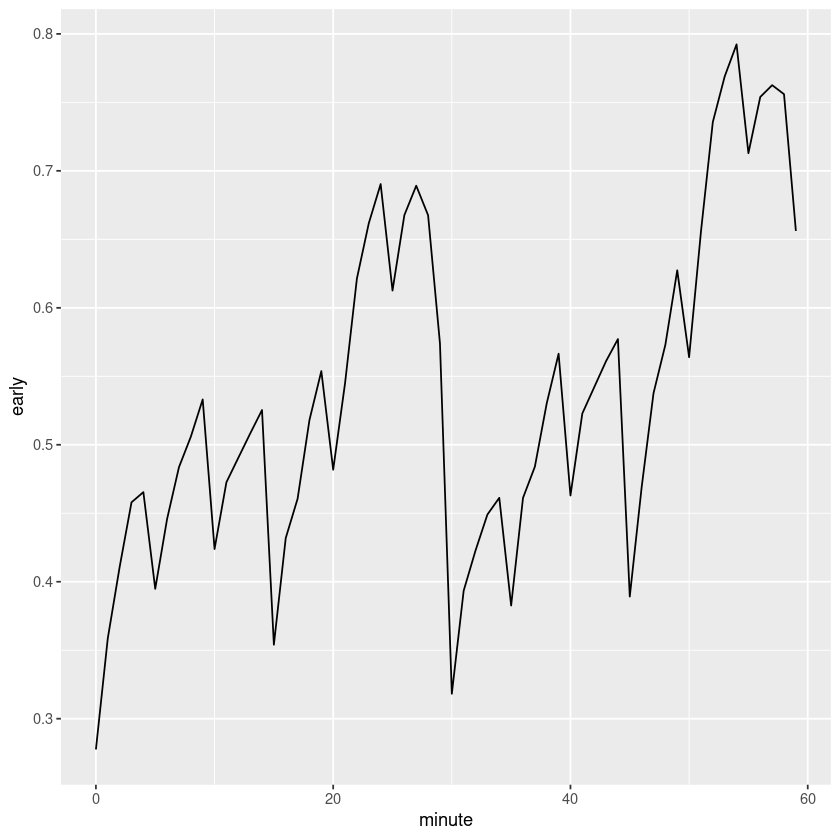

In [60]:
flights_dt %>%
    mutate(minute = minute(dep_time),
           early = dep_delay < 0) %>%
    group_by(minute) %>%
    summarize(early = mean(early, na.rm = TRUE),
              n = n()) %>%
    ggplot(aes(minute, early)) +
        geom_line()

## __Time Spans__

Next you’ll learn about how arithmetic with dates works, including
subtraction, addition, and division. Along the way, you’ll learn
about three important classes that represent time spans:

* _Durations_, which represent an exact number of seconds
* _Periods_, which represent human units like weeks and months
* _Intervals_, which represent a starting and ending point

### Durations

In R, when you subtract two dates, you get a difftime object:

In [61]:
# how old id Hadley?
h_age <- today() - ymd(19791014)
h_age

Time difference of 14943 days

A difftime class object records a time span of seconds, minutes,
hours, days, or weeks. This ambiguity can make difftimes a little
painful to work with, so lubridate provides an alternative that
always uses seconds—the duration:

In [62]:
as.duration(h_age)

[1] "1291075200s (~40.91 years)"

A difftime class object records a time span of seconds, minutes,
hours, days, or weeks. This ambiguity can make difftimes a little
painful to work with, so lubridate provides an alternative that
always uses seconds—the duration:m

In [63]:
dseconds(15)

[1] "15s"

In [64]:
dminutes(19)

[1] "1140s (~19 minutes)"

In [65]:
dhours(c(12, 24))

[1] "43200s (~12 hours)" "86400s (~1 days)"

In [66]:
ddays(0:5)

[1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
[4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"

In [67]:
dweeks(3)

[1] "1814400s (~3 weeks)"

In [68]:
dyears(1)

[1] "31557600s (~1 years)"

Durations always record the time span in seconds. Larger units are
created by converting minutes, hours, days, weeks, and years to seconds at the standard rate (60 seconds in a minute, 60 minutes in an
hour, 24 hours in day, 7 days in a week, 365 days in a year).
You can add and multiply durations:

In [69]:
2 * dyears(1)

[1] "63115200s (~2 years)"

In [70]:
dyears(1) + dweeks(12) + dhours(15)

[1] "38869200s (~1.23 years)"

You can add and subtract durations to and from days


In [71]:
tomorrow <- today() + ddays(1)
last_year <- today() - dyears(1)

However, because durations represent an exact number of seconds,
sometimes you might get an unexpected result:

In [72]:
one_pm <- ymd_hms(
    '2016-03-12 13:00:00',
    tz = 'America/New_York'
)

In [73]:
one_pm

[1] "2016-03-12 13:00:00 EST"

In [74]:
one_pm + ddays(1)

[1] "2016-03-13 14:00:00 EDT"

## Periods

To solve this problem, lubridate provides periods. Periods are time
spans but don’t have a fixed length in seconds; instead they work
with “human” times, like days and months. That allows them to
work in a more intuitive way:

In [75]:
one_pm

[1] "2016-03-12 13:00:00 EST"

In [76]:
one_pm + days(1)

[1] "2016-03-13 13:00:00 EDT"

Like durations, periods can be created with a number of friendly
constructor functions:

In [78]:
seconds(15)

[1] "15S"

In [79]:
minutes(10)

[1] "10M 0S"

In [80]:
hours(c(12, 24))

[1] "12H 0M 0S" "24H 0M 0S"

In [81]:
days(7)

[1] "7d 0H 0M 0S"

In [82]:
months(1:6)

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S" "4m 0d 0H 0M 0S"
[5] "5m 0d 0H 0M 0S" "6m 0d 0H 0M 0S"

In [83]:
weeks(3)

[1] "21d 0H 0M 0S"

In [84]:
years(1)

[1] "1y 0m 0d 0H 0M 0S"

In [85]:
# you can add and multiply periods
10 * (months(6) + days(1))

[1] "60m 10d 0H 0M 0S"

In [86]:
days(50) + hours(25) + minutes(2)

[1] "50d 25H 2M 0S"

And of course, add them to dates. Compared to durations, periods
are more likely to do what you expect:

In [87]:
# a leap year
ymd('2016-01-01') + dyears(1)

[1] "2016-12-31 06:00:00 UTC"

In [88]:
ymd('2016-01-01') + years(1)

[1] "2017-01-01"

In [89]:
# daylight savings time
one_pm + ddays(1)

[1] "2016-03-13 14:00:00 EDT"

In [90]:
one_pm + days(1)

[1] "2016-03-13 13:00:00 EDT"

Let’s use periods to fix an oddity related to our flight dates. Some
planes appear to have arrived at their destination before they departed from New York City:

In [91]:
flights_dt %>%
    filter(arr_time < dep_time)

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>
EWR,BQN,9,-4,2013-01-01 19:29:00,2013-01-01 19:20:00,2013-01-01 00:03:00,2013-01-01 00:07:00,192
JFK,DFW,59,NA,2013-01-01 19:39:00,2013-01-01 18:40:00,2013-01-01 00:29:00,2013-01-01 21:51:00,NA
EWR,TPA,-2,9,2013-01-01 20:58:00,2013-01-01 21:00:00,2013-01-01 00:08:00,2013-01-01 23:59:00,159
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
EWR,SFO,80,42,2013-09-30 22:33:00,2013-09-30 21:13:00,2013-09-30 01:12:00,2013-09-30 00:30:00,318
JFK,MCO,154,130,2013-09-30 22:35:00,2013-09-30 20:01:00,2013-09-30 00:59:00,2013-09-30 22:49:00,123
JFK,PSE,-10,-25,2013-09-30 23:49:00,2013-09-30 23:59:00,2013-09-30 03:25:00,2013-09-30 03:50:00,196


These are overnight flights. We used the same date information for
both the departure and the arrival times, but these flights arrived on
the following day. We can fix this by adding days(1) to the arrival
time of each overnight flight:

In [92]:
flights_dt <- flights_dt %>%
    mutate(overnight = arr_time < dep_time,
           arr_time = arr_time + days(overnight * 1),
           sched_arr_time = sched_arr_time + days(overnight * 1))

In [94]:
# now all our flights obey the laws of physics
flights_dt %>%
    filter(overnight, arr_time < dep_time)

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,overnight
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<lgl>


## __Intervals__

It’s obvious what dyears(1) / ddays(365) should return: one,
because durations are always represented by a number of seconds,
and a duration of a year is defined as 365 days’ worth of seconds.
What should years(1) / days(1) return? Well, if the year was
2015 it should return 365, but if it was 2016, it should return 366!
There’s not quite enough information for lubridate to give a single
clear answer. What it does instead is give an estimate, with a warning:

In [96]:
years(1) / days(1)

[1] 365.25

If you want a more accurate measurement, you’ll have to use an
interval. An interval is a duration with a starting point; that makes it
precise so you can determine exactly how long it is:

In [97]:
next_year <- today() + years(1)
(today() %--% next_year) / ddays(1)

[1] 365

In [98]:
# to find out how many periods fall into an interval
# you need to use integer division
(today() %--% next_year) %/% days(1)

[1] 365